In [1]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
path = '../../data_me/'
paramchar_damping= "tmax5_Nq2_Nc6_amp0.0000_kappa0.1000_wq5.3037_anh15.7563_wc5.3037_g0.2500_wd7.5000_ms1e-04_dimexp20_qb[1]_11_TRSM3.d"
times_damping = np.loadtxt(path+"N_"+paramchar_damping)[:,0]
photons_damping = np.loadtxt(path+"N_"+paramchar_damping)[:,1]
#paramchar= "tmax50_Nq2_Nc6_amp0.0000_kappa0.0200_wq5.3037_anh15.7563_wc5.3037_g0.0000_wd7.5000_ms1e-04_dimexp20_qb[1]_11_TRSM3.d"
#times_me_cal = np.loadtxt(path+"N_"+paramchar)[:,0]
#photons_me_cal = np.loadtxt(path+"N_"+paramchar)[:,1]

dyns={}
path = '../../data_mac/data_0112/'

paramchar= "nl2_n1_1_E0.25E+00_dtadd0.10_0.20_0_ar0.0_g0.000_gam0.050692_nm250_p0.5E-05_wq5.3037_wc5.304_bc2.400_5.100_5.304_12.600_bw4.000_mr0.00_0.00_0.00_wd5.304_ad0.0000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb1_cv1.0_tmax50"
dyn_cal = da.dynamics(2,path, paramchar)

paramchar= "nl2_n2_2_E0.25E+00_dtadd0.10_0.20_0_ar0.0_g0.250_gam0.050692_nm250_p0.5E-05_wq5.3037_wc5.304_bc2.400_5.100_5.304_12.600_bw4.000_mr0.00_0.00_0.00_wd5.304_ad0.0000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb1_cv0.0_tmax5"
dyns[2] = da.dynamics(2,path, paramchar)
#paramchar= "nl2_n2_3_E0.25E+00_dtadd0.70_0.20_0_ar0.0_g0.250_gam0.016009_nm250_p0.5E-05_wq5.3037_wc5.304_bc2.400_5.100_5.304_12.600_bw4.000_mr0.00_0.00_0.00_wd5.304_ad0.0000_anh159.155_dt0.0050_errl0.1E-03_lsfe20_qb1_cv0.0_tmax5"
#dyns[3] = da.dynamics(2,path, paramchar)
#paramchar= "nl2_n2_4_E0.25E+00_dtadd0.70_0.20_0_ar0.0_g0.250_gam0.016009_nm250_p0.5E-05_wq5.3037_wc5.304_bc2.400_5.100_5.304_12.600_bw4.000_mr0.00_0.00_0.00_wd5.304_ad0.0000_anh159.155_dt0.0050_errl0.1E-03_lsfe20_qb1_cv0.0_tmax5"
#dyns[4] = da.dynamics(2,path, paramchar)


-- fitted decay rate/(2*np.pi) = 0.09999607601931781 GHz


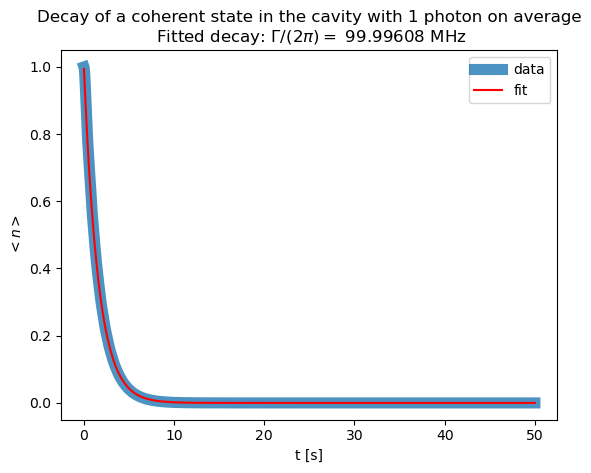

In [3]:
from scipy.optimize import curve_fit

def exp_decay(t,gamma):
    return np.exp( -gamma*t )

opt, _ = curve_fit( exp_decay, dyn_cal.times, dyn_cal.nk[:,0] )
Gamma=opt[0]

print( '-- fitted decay rate/(2*np.pi) =', Gamma/(2*np.pi), "GHz" )

plt.plot( dyn_cal.times[1:], dyn_cal.nk[1:,0], linewidth=8, alpha=0.8,label='data'  )
plt.plot( dyn_cal.times[1:], exp_decay( dyn_cal.times[1:], opt[0]), c='red', label='fit'  )
#plt.plot( times_me_cal, photons_me_cal, label='ME',c='black', dashes=[2,2,2,2]  )
plt.ylabel( "$<n>$" )
plt.xlabel('t [s]')
plt.title('Decay of a coherent state in the cavity with 1 photon on average\n Fitted decay: $\Gamma/(2\pi)=$ '+str(np.round(1e3*Gamma/(2*np.pi),5))+' MHz')
plt.legend()

## CAVITY PHOTON NUMBER and ERROR versus time

In [4]:
from scipy import interpolate
f1 = interpolate.interp1d(times_damping, photons_damping,kind = 'linear')

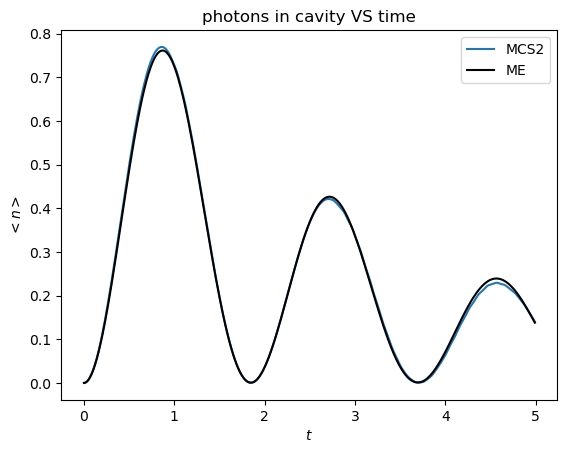

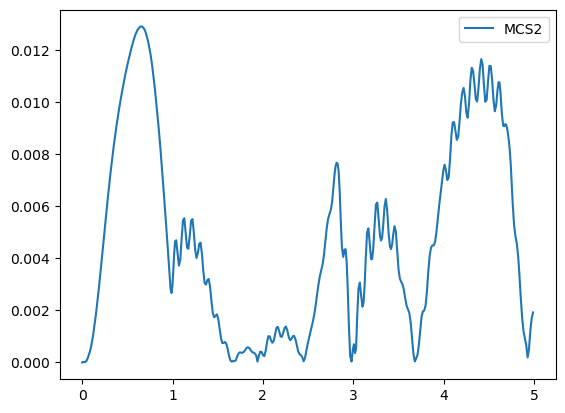

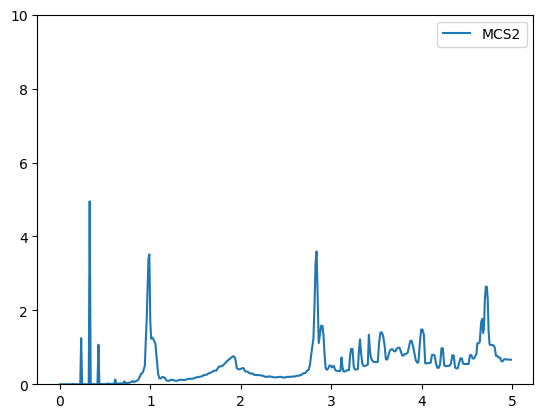

In [5]:
for n in dyns:
    plt.plot( dyns[n].times, dyns[n].nk[:,0], label='MCS'+str(n) )
                                                                               
plt.plot( dyns[n].times, f1(dyns[n].times), label='ME',c='black'  )    

#plt.xlim(0,2)
#plt.ylim(0,0.3)
plt.ylabel( "$<n>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.show()

for n in dyns:
    plt.plot( dyns[n].times, np.abs(dyns[n].nk[:,0]-f1(dyns[n].times)), label='MCS'+str(n) )
    plt.legend()
plt.show()

for n in dyns:
    plt.plot( dyns[n].times, dyns[n].error, label='MCS'+str(n) )
plt.ylim(0,10)
plt.legend()
plt.show()

## **Bath photon spectrum**

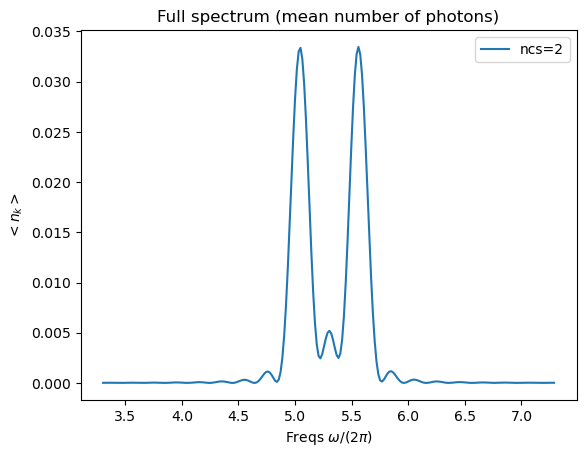

In [6]:
for n in dyns:
    plt.plot( dyns[n].wk/(2*np.pi), dyns[n].nk[-1,1:], label='ncs='+str(n)  )

plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.show()

# **Wigner function of the final state**

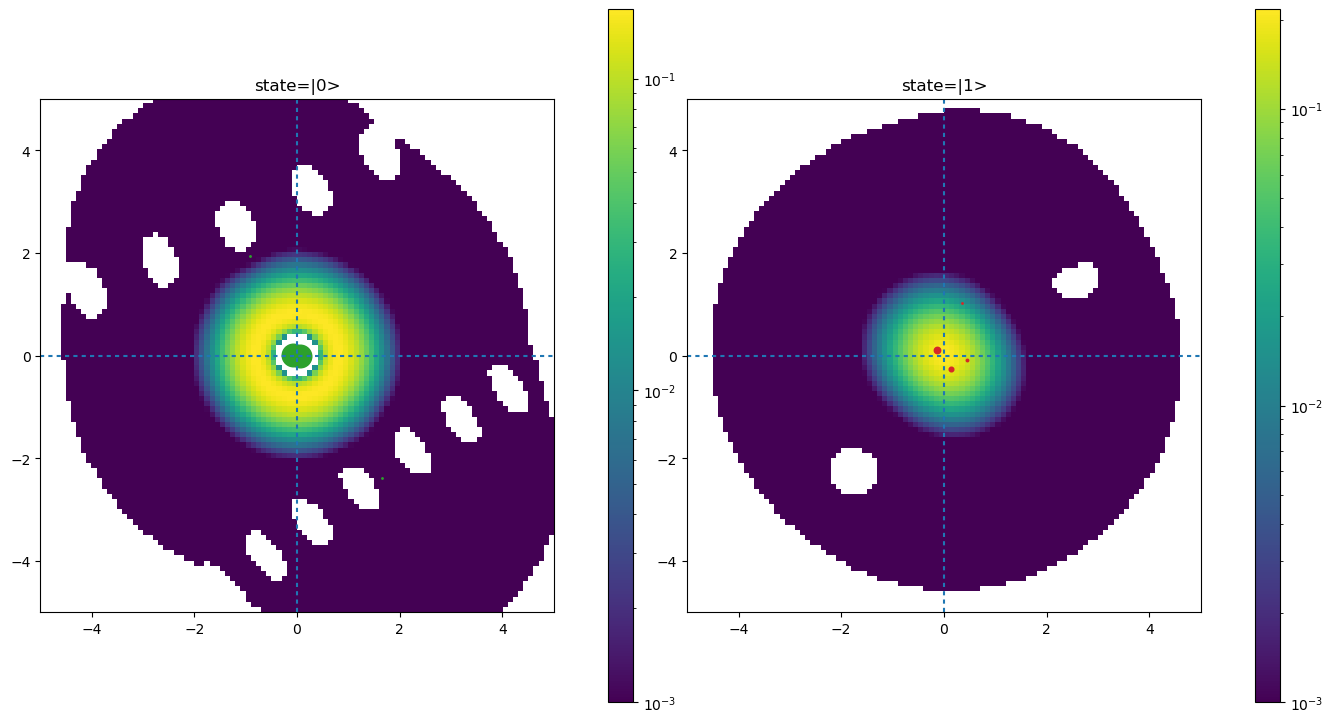

In [52]:
dyns[4].plot_split_wigners(xmin=-5 , log_min=0.001)

In [54]:
dyns[4].full_wigner(xmin=-5 , log_min=0.001)

AttributeError: 'dynamics' object has no attribute 'full_wigner'